In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats  
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
sales = pd.read_csv('Walmart_Sales.csv')

sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Data cleaning
# Convert date format
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)

# Sort data
sales = sales.sort_values(by=['Store','Date'])

# Round numeric columns to specified decimal places
sales['Weekly_Sales'] = sales['Weekly_Sales'].round(2)
sales['Temperature'] = sales['Temperature'].round().astype(int)
sales['Fuel_Price'] = sales['Fuel_Price'].round(2)
sales['CPI'] = sales['CPI'].round(3)
sales['Unemployment'] = sales['Unemployment'].round(3)

In [4]:
# Check for missing values
print("Missing values in each column:")
print(sales.isnull().sum())

Missing values in each column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [5]:
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42,2.57,211.096,8.106
1,1,2010-02-12,1641957.44,1,39,2.55,211.242,8.106
2,1,2010-02-19,1611968.17,0,40,2.51,211.289,8.106
3,1,2010-02-26,1409727.59,0,47,2.56,211.320,8.106
4,1,2010-03-05,1554806.68,0,46,2.62,211.350,8.106


In [6]:
# Holiday Analysis
holiday_sales = sales.groupby('Holiday_Flag')['Weekly_Sales'].agg(['mean','count'])

print("Average sales during holidays:", holiday_sales.loc[1, 'mean'].round(2))
print("Average sales during non-holidays:", holiday_sales.loc[0, 'mean'].round(2))

# t-test
holiday_data = sales[sales['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_data = sales[sales['Holiday_Flag'] == 0]['Weekly_Sales']
t_stat, p_value = stats.ttest_ind(holiday_data, non_holiday_data)

print("P-value from t-test:", p_value)

Average sales during holidays: 1122887.89
Average sales during non-holidays: 1041256.38
P-value from t-test: 0.003078699263818616


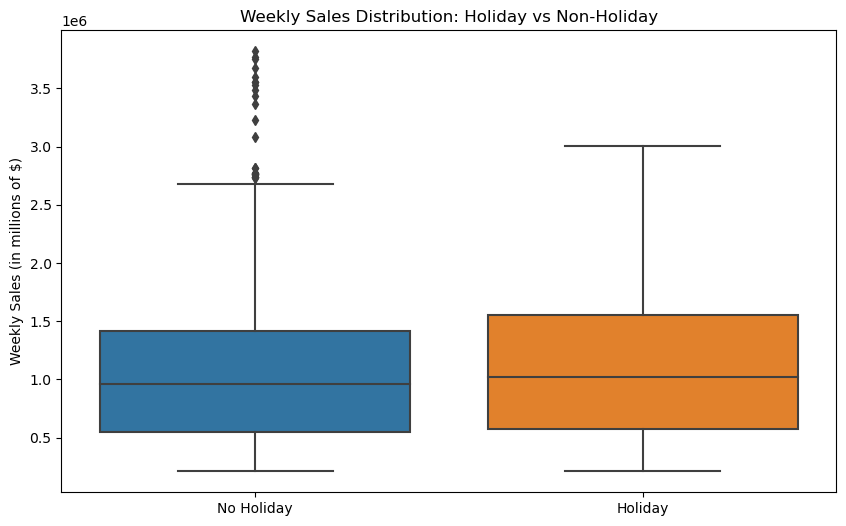

In [7]:
# Visualisations
plt.figure(figsize=(10, 6))  # Set figure size
sns.boxplot(data=sales, x='Holiday_Flag', y='Weekly_Sales')
plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday')

plt.xticks([0, 1], ['No Holiday', 'Holiday'])

plt.xlabel('')
plt.ylabel('Weekly Sales (in millions of $)')

plt.show()

In [8]:
# Unemployment Analysis
store_unemployment = sales.groupby('Store')['Unemployment'].mean().sort_values()

print("Stores with the lowest unemployment rates:")
print(store_unemployment.head().round(2))
print("Stores with the highest unemployment rates:")
print(store_unemployment.tail().round(2))

correlations = sales[['Unemployment', 'CPI', 'Fuel_Price', 'Temperature']].corr()['Unemployment']
print("Correlations with Unemployment")
print(correlations.round(3))

Stores with the lowest unemployment rates:
Store
23    4.80
40    4.80
4     5.96
8     6.09
9     6.10
Name: Unemployment, dtype: float64
Stores with the highest unemployment rates:
Store
34     9.93
43     9.93
38    13.12
28    13.12
12    13.12
Name: Unemployment, dtype: float64
Correlations with Unemployment
Unemployment    1.000
CPI            -0.302
Fuel_Price     -0.035
Temperature     0.101
Name: Unemployment, dtype: float64


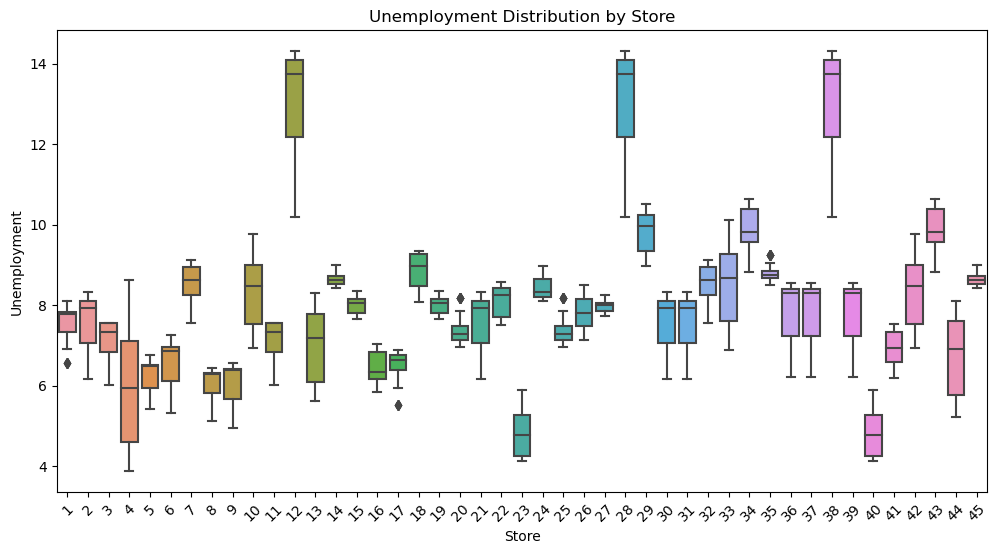

In [9]:
# Visualisation
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales, x='Store', y='Unemployment')
plt.title('Unemployment Distribution by Store')
plt.xticks(rotation=45)
plt.show()

In [10]:
# CPI and Weekly Sales Analysis
corr_holiday = sales[sales['Holiday_Flag'] == 1][['CPI', 'Weekly_Sales']].corr().iloc[0,1]
corr_non_hoilday = sales[sales['Holiday_Flag'] == 0][['CPI', 'Weekly_Sales']].corr().iloc[0,1]

print("Correlation during holidays", corr_holiday.round(3))
print("Correlation during non-holidays", corr_non_hoilday.round(3))

Correlation during holidays -0.081
Correlation during non-holidays -0.072


<function matplotlib.pyplot.show(close=None, block=None)>

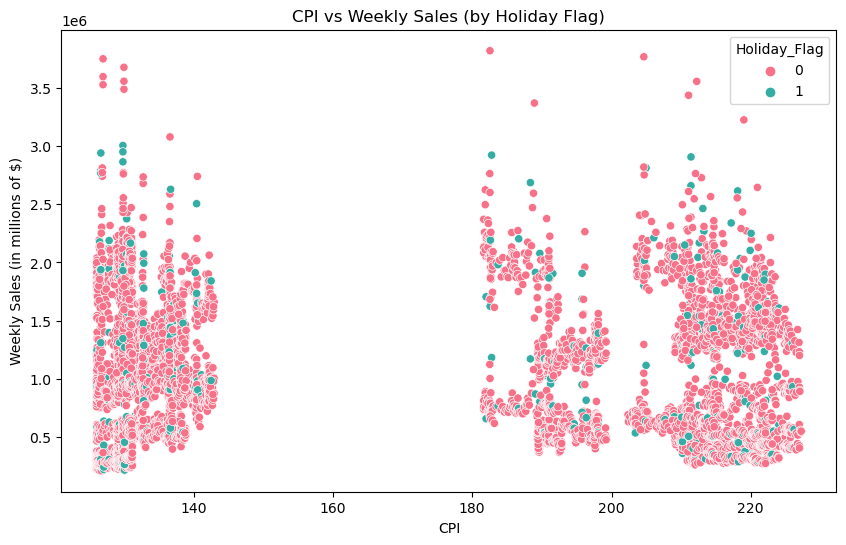

In [11]:
# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales, x='CPI', y='Weekly_Sales', hue='Holiday_Flag', palette="husl")
plt.title('CPI vs Weekly Sales (by Holiday Flag)')
plt.ylabel('Weekly Sales (in millions of $)')
plt.show

In [12]:
# Fuel Price Analysis
fuel_corr = sales[['Fuel_Price', 'Weekly_Sales', 'Temperature', 'CPI', 'Unemployment']].corr()['Fuel_Price']

print("Correlation with Fuel Price:")
print(fuel_corr)

Correlation with Fuel Price:
Fuel_Price      1.000000
Weekly_Sales    0.009515
Temperature     0.144759
CPI            -0.170572
Unemployment   -0.035039
Name: Fuel_Price, dtype: float64


<Figure size 2000x600 with 0 Axes>

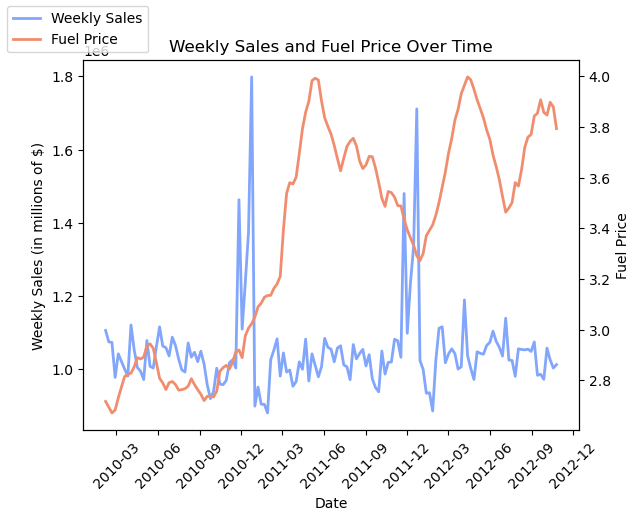

In [13]:
# Visualisation
plt.figure(figsize=(20, 6))
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales (in millions of $)')
line1, = ax1.plot(sales.groupby('Date')['Weekly_Sales'].mean(), color=sns.color_palette("coolwarm", 8)[1], label='Weekly Sales', linewidth=2)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Fuel Price')
line2, = ax2.plot(sales.groupby('Date')['Fuel_Price'].mean(), color=sns.color_palette("coolwarm", 8)[6], label='Fuel Price', linewidth=2)
ax2.tick_params(axis='y')

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set major ticks to every 3 months
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
ax1.tick_params(axis='x', rotation=45)

fig.legend([line1, line2], ['Weekly Sales', 'Fuel Price'], loc='upper left')

plt.title('Weekly Sales and Fuel Price Over Time')
plt.show()